# Graphene Analysis

Below we read in the data collected from our graphene experiment. In particular, we collected the lock-in voltage as a function of back gate voltage (via a LabView program). Recall that as the backgate voltages sweeps through the entire range of measurements, the Fermi level will sweep through the sample of graphene. Theoretically, there should be a point where the Fermi level is at the point where the tips of the Dirac cones meet; at that point the density of states goes to zero and as a result the conductivity should go to zero, which is something that we should be able to see. In practice, due to issues in the sample and doping via processing chemicals, this may not be manifestly obvious. 

Below we plot the data to see trends and in the latter ones we fit the data with a Lorentzian in hopes of "seeing" if there is a peak. 

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

### Read in the datafiles
1. We have the data stored in text files; we can read them into Pandas DataFrame for easier visualization of the data in Jupyter
2. Note: this is the data collected on day 1. There were numerous issues with our samples as explained in the lab report including gold that wasn't removed fully in the lift off stage which lead to shorting of the circuits. This is reflected in the noisy data. 

In [2]:
raza_df = pd.read_csv('3b_raza_30v_100pts', sep = "\t", header = None, names = ['V Gate', 'V LI'])
vinh_df = pd.read_csv('3b_vinh_40V_100Pts', sep = "\t", header = None, names = ['V Gate', 'V LI'])

In [3]:
raza_df

,V Gate,V LI
0,-30.0,4.899960e-07
1,-29.4,4.987270e-07
2,-28.8,4.782960e-07
3,-28.2,4.993670e-07
4,-27.6,5.044890e-07
...,...,...
96,27.6,4.895300e-07
97,28.2,5.016370e-07
98,28.8,5.126970e-07
99,29.4,5.392980e-07


### Extracting Data to Numpy Arrays
1. Below we extract the data from the DataFrames and store them into one-dimensional Numpy arrays for plotting. We can probably work with the DataFrame itself, but this allows us the flexibility of working with each data array directly. 

In [4]:
# first create 2D numpy array object from DataFrame 
raza = raza_df.to_numpy()

# extract columns out
# first column is the gate voltage
# second column is the lock in voltage
raza_gate = raza[:,0]
raza_lock_in = raza[:,1]

vinh = vinh_df.to_numpy()
vinh_gate = vinh[:,0]
vinh_lock_in = vinh[:,1]

### Plotting the Data
1. Again, just day one data. It overall seems noisy/does not seem to indicate any meaningful trends. 

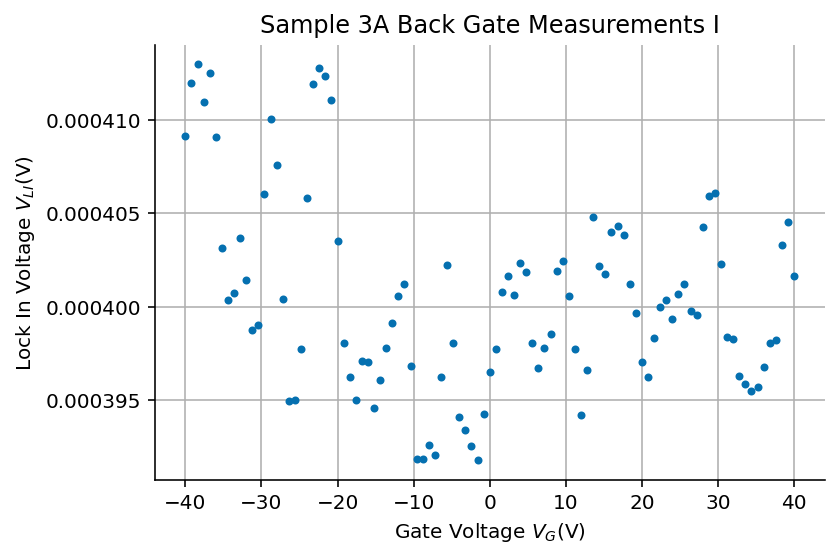

In [12]:
# Vinh's sample 

# main plotting function call 
plt.plot(vinh_gate, vinh_lock_in, '.', color = '#0570b0')

# aesthetics, removes the top and right borders 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# labels 
plt.xlabel("Gate Voltage $V_G$(V)")
plt.ylabel("Lock In Voltage $V_{LI}$(V)")
plt.grid()
plt.title("Sample 3A Back Gate Measurements I")
plt.savefig('Vinh_Gate_Voltage.pdf', bbox_inches='tight')
plt.show()

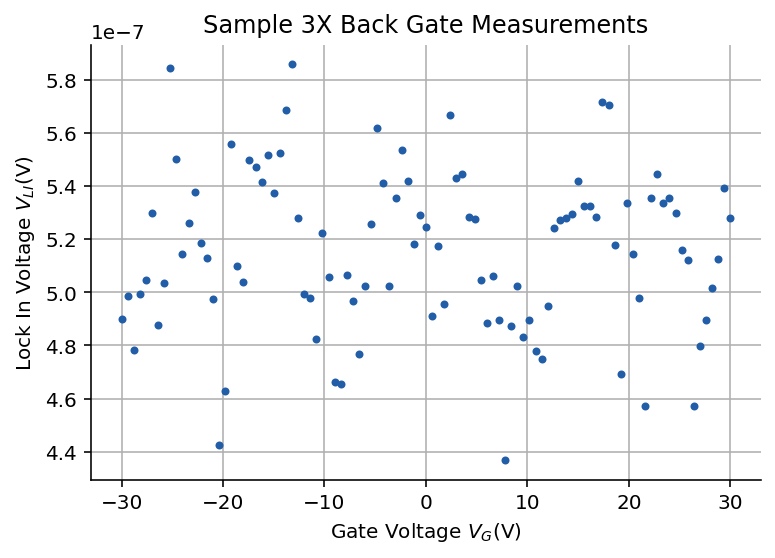

In [13]:
# Raza's Plot
plt.plot(raza_gate, raza_lock_in, '.', color = '#225ea8')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Gate Voltage $V_G$(V)")
plt.ylabel("Lock In Voltage $V_{LI}$(V)")
plt.grid()
plt.title("Sample 3X Back Gate Measurements")
#plt.savefig('Raza_Gate_Voltage.pdf', bbox_inches='tight')
plt.show()

## Day Two Data
1. We try to fix our samples by scratching off problematic electrodes and by scratching a deeper gate and cleaning the probes. The resulting data is what we have here. 
2. We have two data files. 
    - The first file corresponds to scratching electrode and gate but prior to cleaning sample. 
    - The second file corresponds to cleaning sample by blasting with nitrogen 

In [7]:
# reading in data files into DataFrame 

# first file corresponds to scratching electrode and gate but prior to cleaning sample 
vinh_40_first = pd.read_csv('Vinh_Backgate_40V_800_points', sep = '\t',\
                            header = None, names = ['V Gate', 'V LI'])
# second file corresponds to cleaning sample by blasting with nitrogen 
vinh_40_after = pd.read_csv('Vinh_Backgate_40V_800_points_after_cleaning', sep = "\t",\
                            header = None, names = ['V Gate', 'V LI'])

# extracting data to numpy arrays 
vinh_40 = vinh_40_first.to_numpy()
vinh_40_gate = vinh_40[:,0]
vinh_40_lock_in = vinh_40[:,1]

vinh_after = vinh_40_after.to_numpy()
vinh_after_gate = vinh_after[:,0]
vinh_after_lock_in = vinh_after[:,1]

### Fitting Lorentzian 
Because theoretically the data is expected to exhibit a "peak" we want to perhaps locate or make more clearly where this peak occurs. To do this, we can fit a function that peaks such as a Gaussian or a Lorentzian. To do this, we need to define the function and its parameters and then call a curve fitting routine. Here we use scipy.curve_fit and fit the Lorentzian to the data. Ie, we can use the function below 
$$
    L(x) = \frac{1}{\pi} \frac{\Gamma/2}{(x-x_0)^2 + (\Gamma/2)^2}  
$$
where $x_0, \Gamma$ are fitting parameters which characterize the center and width of the curve respectively.

In [8]:
def lorentzian(x, x0, a, gam, d):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2) + d

popt_lorentz, pcov_lorentz = curve_fit(lorentzian, vinh_after_gate, vinh_after_lock_in)

popt_lorentz_2, pcov_loretz_2 = curve_fit(lorentzian, vinh_40_gate, vinh_40_lock_in)

### Plotting the Day 2 Data (with Lorentzian Fittings)
1. We see overall that the data here does seem to follow more of a curve/exhibit some sort of meaningful backgate dependency when compared to Day 1 data. However, the data does still seem very much noisy in the end even despite our use of a Lock-In amplifier. 

#### Data File 1: Prior to Cleaning 

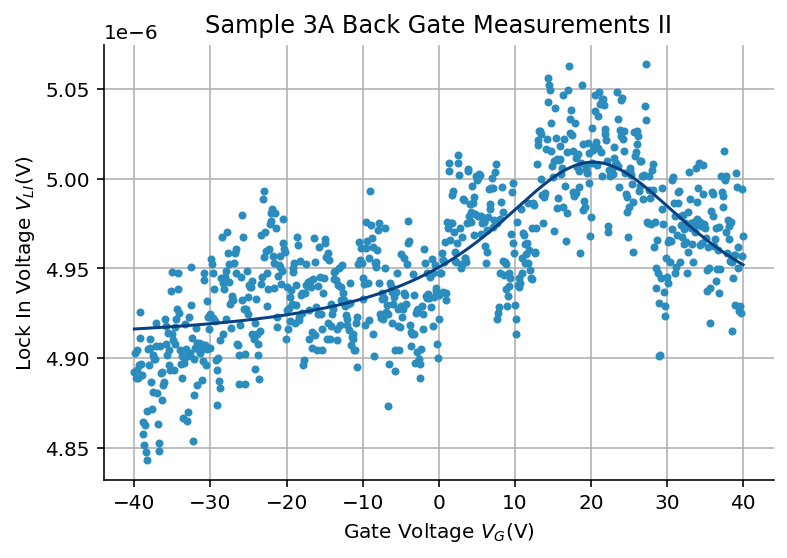

In [14]:
plt.plot(vinh_40_gate, vinh_40_lock_in, '.', color = '#2b8cbe')
plt.plot(vinh_after_gate, lorentzian(vinh_40_gate, *popt_lorentz_2), color = '#084081')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Gate Voltage $V_G$(V)")
plt.ylabel("Lock In Voltage $V_{LI}$(V)")
plt.grid()
plt.title("Sample 3A Back Gate Measurements II")
#plt.savefig('Vinh_40_Gate_Voltage.pdf', bbox_inches='tight')
plt.show()

#### Datafile 2: After Cleaning 

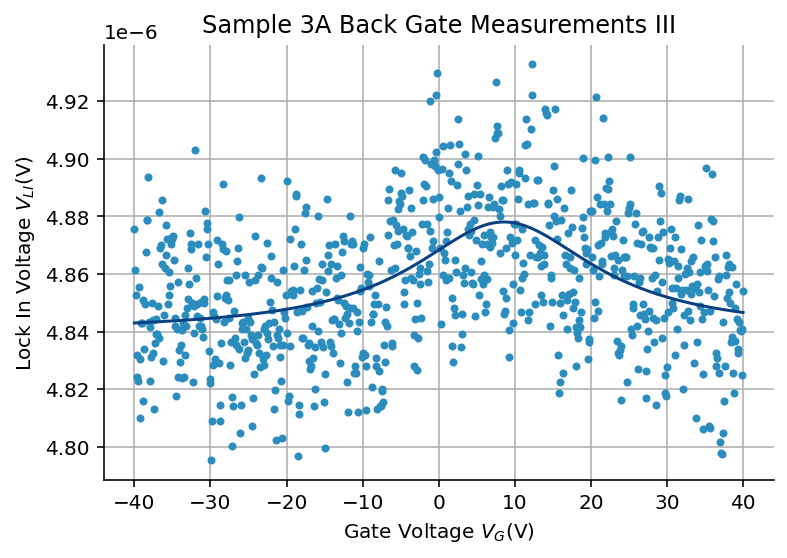

In [15]:
plt.plot(vinh_after_gate, vinh_after_lock_in, '.', color = '#2b8cbe')
plt.plot(vinh_after_gate, lorentzian(vinh_after_gate, *popt_lorentz), color = '#084081')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xlabel("Gate Voltage $V_G$(V)")
plt.ylabel("Lock In Voltage $V_{LI}$(V)")
plt.grid()
plt.title("Sample 3A Back Gate Measurements III")
plt.savefig('Vinh_after_Gate_Voltage.pdf', bbox_inches='tight')
#plt.show()